# Problem 2 

## Problem Description

In this problem you will use `sklearn.svm.SVC` to classify thermal imaging data of a CPU die. We are interested in classifying points on the die as critical or non-critical, to inform where thermal paste should be applied to the die. The thermal imaging data is noisy, so your boss has asked you to develop a model that can produce a smoother profile of where the die is expected to be at, or above critical temperature.

The thermal imaging data is contained in `cputemp.npy`, where the first two columns correspond to the x and y position on the die, and the third column corresponds to the temperature at that point in degrees Celsius.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
Functions:
- `accuracy(model, X, y)`

Results:
- Print the accuracy of the two models requested on classifying the training set points as critical or non-critical temperature

Plots:
- Plot the decision boundary of each trained model with the provided plotting functions

Discussion:
- Compare the plots and accuracy of the two models, and reason which model is the better of the two

#### Imports and Utility Functions:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

def plot_svc_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1],
               linestyles=['--', '-', '--'],
               linewidths = [2,4,2])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

def plot_temp_profile(X, T, ax = None):
    if ax == None:
        ax = plt.gca()
    # Plot points colored by temperature
    sc = ax.scatter(X[:,0],X[:,1],c = T)
    # Add colorbar to plot
    cbar = plt.colorbar(sc)
    # Add labels
    cbar.set_label('Temperature ($\degree C$)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

def plot_temp_critical(X, y, ax = None):
    if ax is None:
        ax = plt.gca()
        showflag = True
    else:
        showflag = False
    ax.scatter(X[:,0],X[:,1], c = y, cmap = ListedColormap(['blue', 'red']))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect(0.8)
    if showflag:
        plt.show()
    else:
        return ax

def plot_model(model, X, y):
    # Wrapper function to generate plot and decision boundary
    ax = plt.gca()
    ax = plot_temp_critical(X,y,ax)
    plot_svc_decision_function(model, ax)

## Load and visualize the data

Data is contained in `cputemp.npy` and can be loaded with `np.load()`. The first two columns of the file correspond to the x and y position on the die, and the third columns corresponds to the temperature at that position in degrees Celsius.

Store the data as:
- `X` (Nx2) array of position data
- `T` (Nx1) array of temperature data

Then visualize the data with `plot_temp_profile(X,T)`

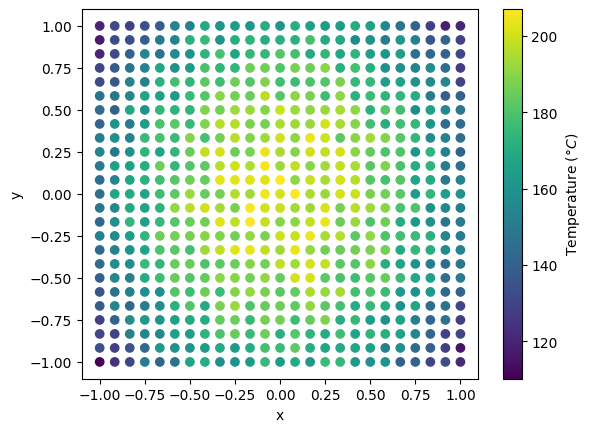

In [8]:
data = np.load("data/cputemp.npy")
X = data[:, 0:2]
T = data[:, 2].reshape(-1, 1)
plot_temp_profile(X,T)

## Assign labels to data

Now we need to assign labels to the data for the support vector machine to be able to classify points as critical or non-critical. Generate a boolean vector `y` that is True for points at or above $180 \text{\textdegree}C$, and False otherwise. Then use `plot_temp_critical(X,y)` to plot the points on the die that are critical and non-critical.

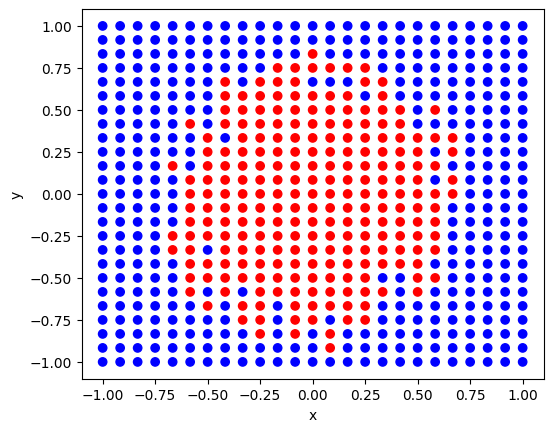

In [15]:
critical_temp_threshold = 180
y = (T >= critical_temp_threshold).flatten()

plot_temp_critical(X,y)

## Train Support Vector Classifiers

Now you can train a SVC to classify the region on the die that you expect to be at or above the critical temperature. Using sklearn.svm.SVC train the following two models:

- RBF Kernel with C = 100
- 8th order polynomial Kernel with C = 100

Write a function `accuracy(model, X, y)` that takes in the model, evaluates the points in X, and computes an accuracy between the predictions and ground truth labels in `y`. Accuracy is defined as the number of correctly classified points, divided by the total number of points. For a more in depth discussion of accuracy please see: [Accuracy - Wikipedia](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification). We will cover this topic more later in the course.

For each model, report the accuracy on the training data and use `plot_model(model, X, y)` to visualize the decision boundary.

Accuracy of RBF Kernel SVC: 93.28%


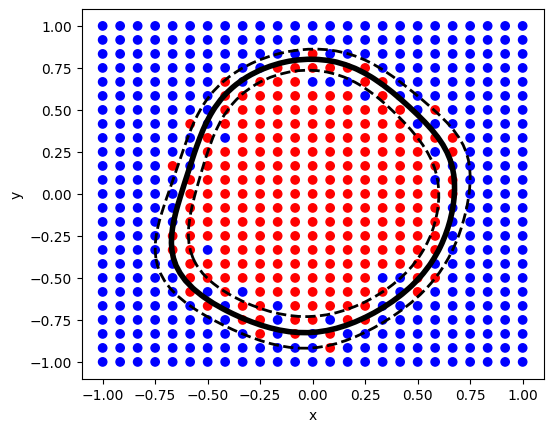

In [20]:
svc_model = SVC(kernel='rbf', C=100)
svc_model.fit(X, y)

y_pred = svc_model.predict(X)
rbf_accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy of RBF Kernel SVC: {rbf_accuracy:.2f}%")
plot_model(svc_model, X, y)

Accuracy of 8th-Order Polynomial SVC: 92.32%


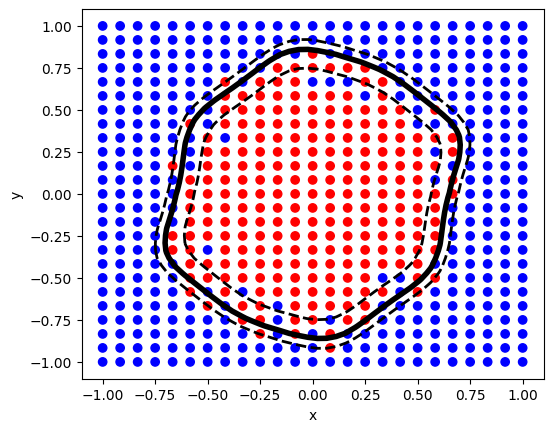

In [22]:
svc_poly_model = SVC(kernel='poly', degree=8, C=100)
svc_poly_model.fit(X, y)

y_pred_poly = svc_poly_model.predict(X)
poly_accuracy = np.mean(y_pred_poly == y) * 100
print(f"Accuracy of 8th-Order Polynomial SVC: {poly_accuracy:.2f}%")
plot_model(svc_poly_model, X, y)

## Discussion

Briefly discuss the performance of the two models, both with regard to their accuracy and the appearance of the decision boundary. Which model would you submit to your boss?

The accuracies are almost similar. The rbf is slightly lower than the poly model.
The rbf model is smooth, simple and regular shape. It is not overly influenced by the all data points. On the other poly model looks complex and wiggles more, looks like its starting to overfit.

I would submit the rbf model to my boss, it is smooth and simple and not trying to overfit. The poly model more likely to make unreliable predictions on future data